##Read the data as an appropriate Time Series data and plot the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Rose.csv")
df=pd.read_csv(path,parse_dates=True)

In [ ]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


* There are 187 rows and 2 columns in the dataset.
* The data is from 1-Jan-1980 to 1-July-1995, which is a sale of Rose wine for 15 years of each month.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


* Here from the above table we can see that the YearMonth column is in object type data type we need to change it into Datetime data type.
* Created a date range starting with 1-Jan-1980 , using frequency as Month and periods as length of the data set.
* Created a new column Time stamp by using the date range created and set it as the index for the data set.
* Dropped column YearMonth from the dataset.


In [ ]:
date=pd.date_range(start="1/1/1980",freq="MS",periods=len(df))
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [ ]:
df["Time_stamp"]=pd.DataFrame(date)
df.set_index(keys=["Time_stamp"],inplace=True)
df.drop(["YearMonth"],axis=1,inplace=True)
df.head()

,Rose
Time_stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [ ]:
df.isnull().sum()

Rose    2
dtype: int64

There are 2 null values in the data set, which can be imputed using interpolation method as linear and limit_direction as forward and limit as 2, as there are 2 null values in the data set.

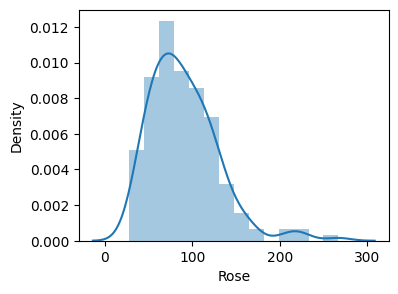

In [ ]:
plt.figure(figsize=(4,3))
sns.distplot(df["Rose"]);

<Figure size 400x300 with 0 Axes>

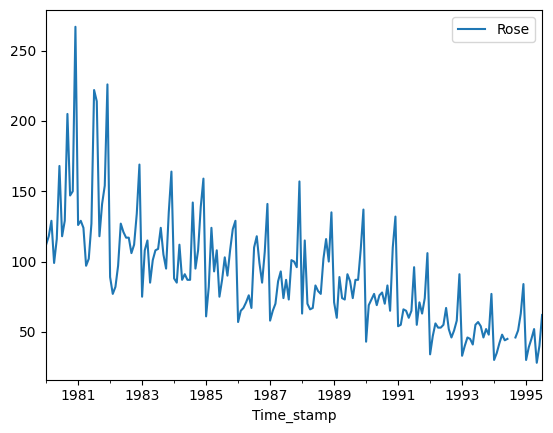

In [ ]:
plt.figure(figsize=(4,3))
df.plot();

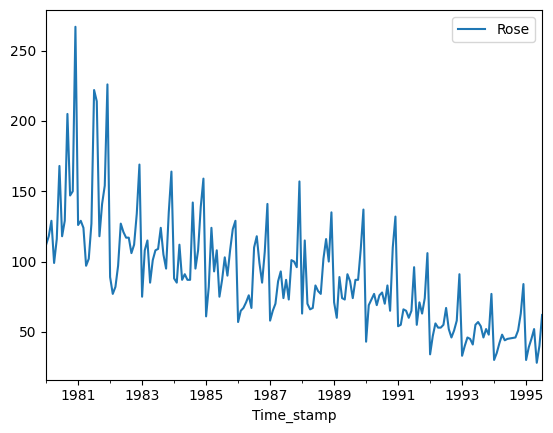

In [ ]:
df = df.interpolate(limit=2, limit_direction="forward",method="linear");
df.plot();

In [ ]:
df["1994-05-01":"1994-09-01"]

,Rose
Time_stamp,
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.333333
1994-08-01,45.666667
1994-09-01,46.000000


#Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [ ]:
df.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [ ]:
monthly_sales_df=pd.pivot_table(df,values="Rose",columns=df.index.year,index=df.index.month)
monthly_sales_df

Time_stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_stamp,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,45.333333,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,45.666667,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.000000,NaN


In [ ]:
monthly_sales_df1=pd.pivot_table(df,values="Rose",columns=df.index.month,index=df.index.year)
monthly_sales_df1

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


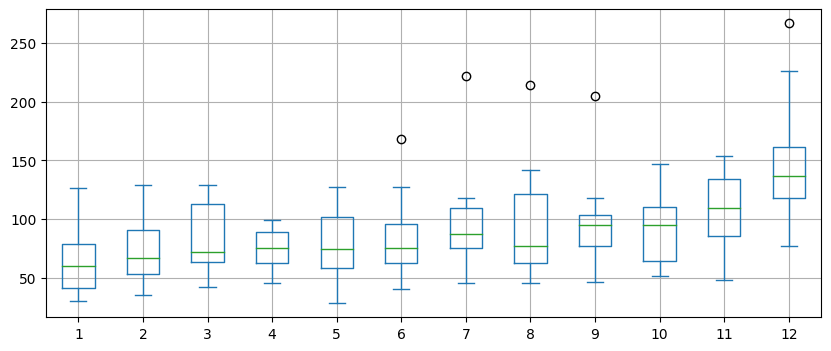

In [ ]:
monthly_sales_df1.plot(kind="box",figsize=(10,4))
plt.grid()

In [ ]:
from pylab import rcParams

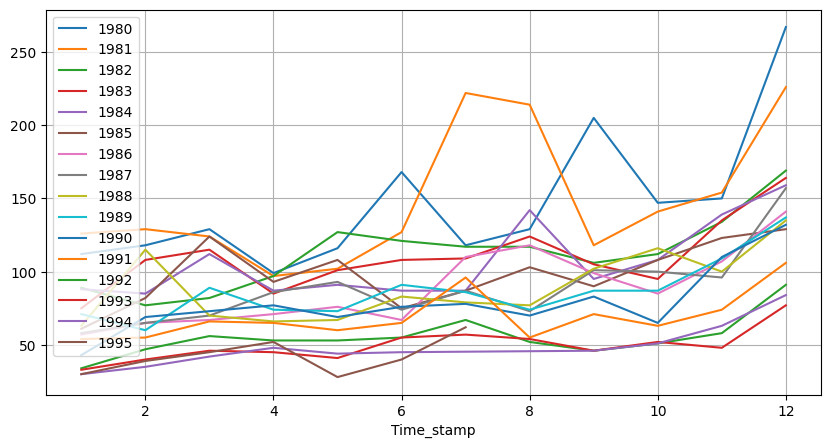

In [ ]:
rcParams["figure.figsize"]=10,5
monthly_sales_df.plot(grid=True);
plt.legend(loc="best")

* There are fluctuations in the sales data, but towards the month of December there is increase in the sales.

In [ ]:
yearly_sales_df=pd.pivot_table(df,values="Rose",columns=df.index.month,index=df.index.year)
yearly_sales_df

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


In [ ]:
yearly_sales_df1=pd.pivot_table(df,values="Rose",columns=df.index.year,index=df.index.month)
yearly_sales_df1

Time_stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_stamp,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,45.333333,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,45.666667,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.000000,NaN


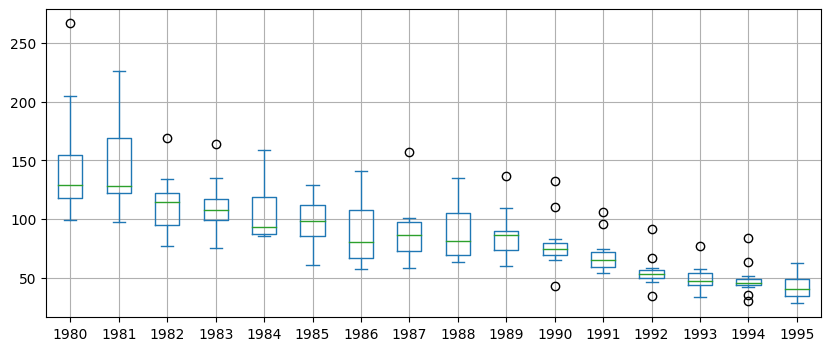

In [ ]:
yearly_sales_df1.plot(kind="box",figsize=(10,4))
plt.grid()

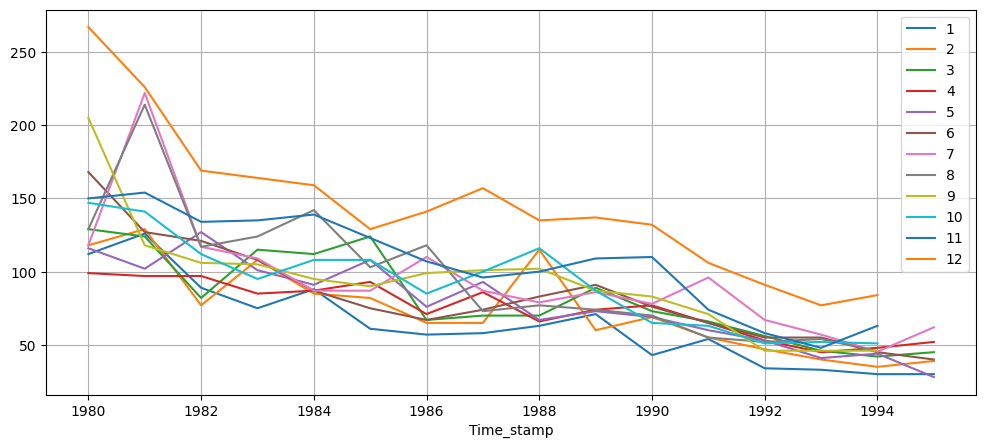

In [ ]:
rcParams["figure.figsize"]=12,5
yearly_sales_df.plot(grid=True);
plt.legend(loc="best")

There is decrease in the sales of Rose wines from 1980 to 1995.

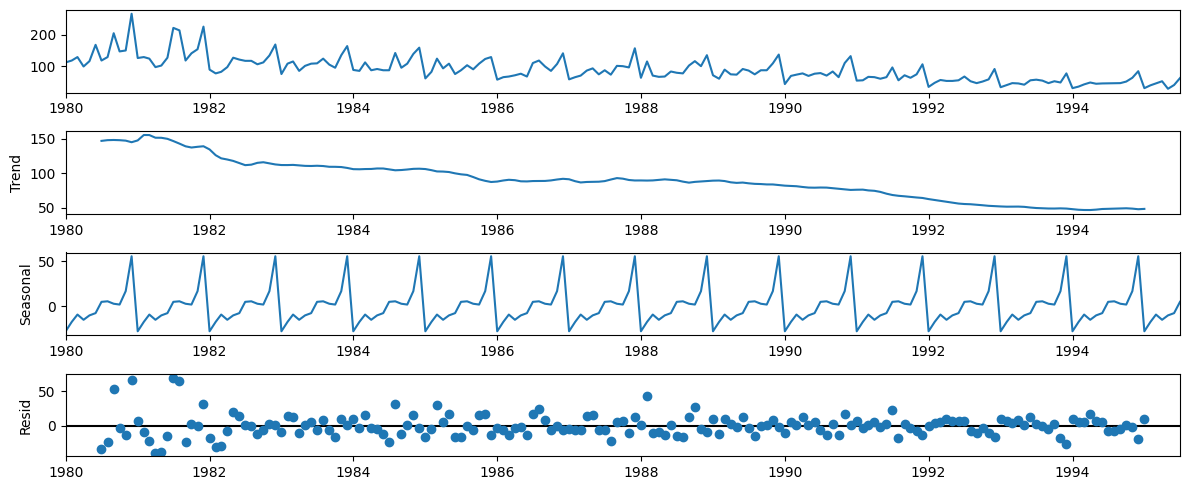

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_additive=seasonal_decompose(df,model="additive")
df_additive.plot();

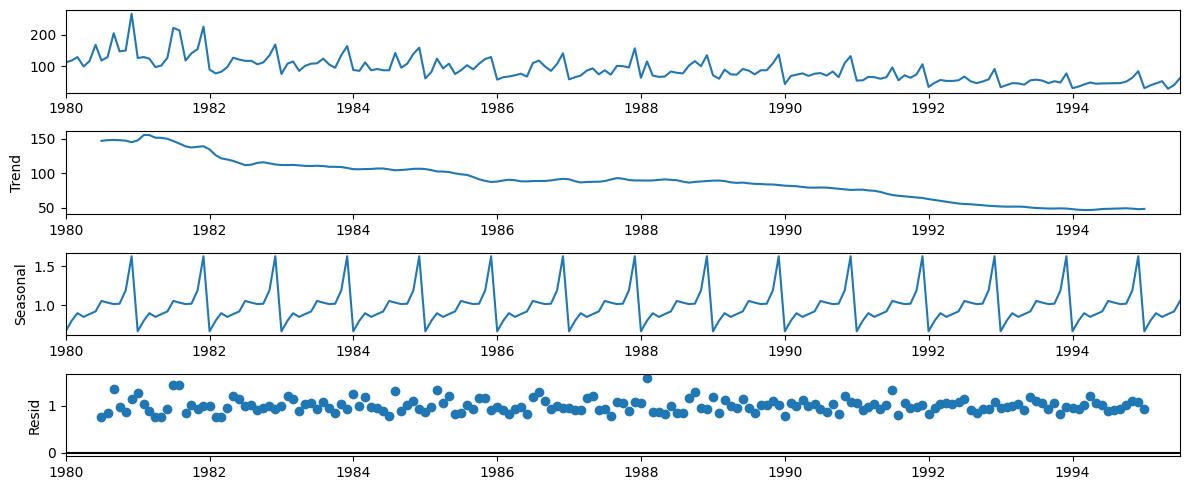

In [ ]:
df_multiplicative=seasonal_decompose(df,model="multiplicative")
df_multiplicative.plot();

#Split the data into training and test. The test data should start in 1991.
* Data is split into training and test set.
* Training date is from 1-Jan-1980 to 1-Jan-1990.
* Test set is from 1-Jan-1991 to 1-July-1995.



In [ ]:
Train=df[df.index.year<1991]
Test=df[df.index.year>=1991]

In [ ]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [ ]:
Train.head()

,Rose
Time_stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [ ]:
Train.tail()

,Rose
Time_stamp,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [ ]:
Test.head()

,Rose
Time_stamp,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [ ]:
Test.tail()

,Rose
Time_stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


#Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#Simple Exponential Smoothing
* Made a copy of Train and Test for Simple Exponential Smoothing as SES_train and SES_test.
* Using Simple Exponential Smoothing with initialization method as estimated built a model with SES_train.
* Built model is fitted with optimized as True.


In [ ]:
SES_train=Train.copy()
SES_test=Test.copy()

In [ ]:
SES_model=SimpleExpSmoothing(SES_train,initialization_method="Estimated")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
SES_model_autofit=SES_model.fit(optimized=True)
SES_model_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* For simple exponential smoothing only level is considered while building model.
* Smoothing level for above model is 0.098
* Then the model is forecasted on to test set.


In [ ]:
SES_predict=SES_model_autofit.forecast(steps=len(SES_test))
SES_predict.head(10)

1991-01-01    87.10498
1991-02-01    87.10498
1991-03-01    87.10498
1991-04-01    87.10498
1991-05-01    87.10498
1991-06-01    87.10498
1991-07-01    87.10498
1991-08-01    87.10498
1991-09-01    87.10498
1991-10-01    87.10498
Freq: MS, dtype: float64

In [ ]:
SES_predict.tail(10)

1994-10-01    87.10498
1994-11-01    87.10498
1994-12-01    87.10498
1995-01-01    87.10498
1995-02-01    87.10498
1995-03-01    87.10498
1995-04-01    87.10498
1995-05-01    87.10498
1995-06-01    87.10498
1995-07-01    87.10498
Freq: MS, dtype: float64

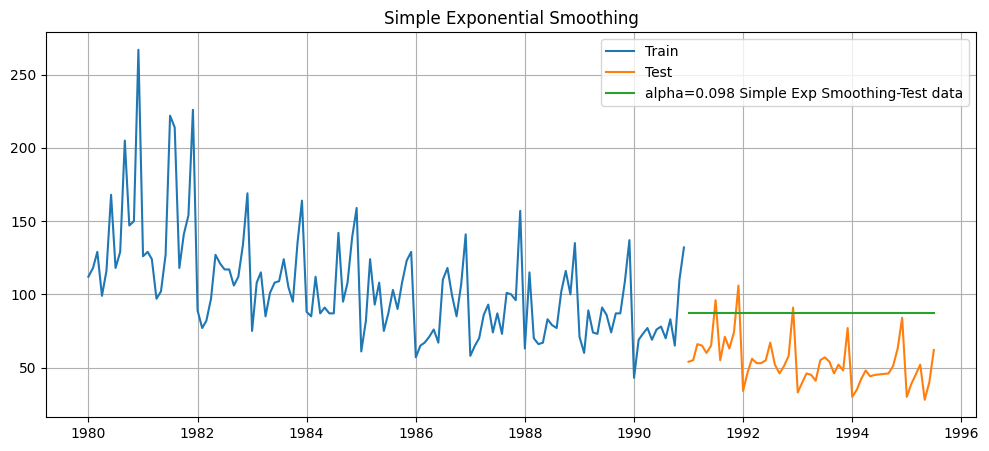

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(SES_predict,label="alpha=0.098 Simple Exp Smoothing-Test data")
plt.grid()
plt.title("Simple Exponential Smoothing")
plt.legend(loc="best")

In [ ]:
rmse_SES=mean_squared_error(SES_test.values,SES_predict.values,squared=False)
rmse_SES

36.79622482462249

In [ ]:
Result_DF=pd.DataFrame({"Test RMSE":[rmse_SES]},index=["alpha=0.098 Simple Exponential Smoothing"])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225


#Double Exponential Smoothing
* Made a copy of Train and Test for Double Exponential Smoothing as DES_train and DES_test.
* Using Double Exponential Smoothing with initialization method as estimated built a model with DES_train.
* Built model is fitted with optimized as True.


In [ ]:
DES_train=Train.copy()
DES_test=Test.copy()

In [ ]:
DES_model=Holt(DES_train,initialization_method="estimated")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
DES_model=DES_model.fit(optimized=True)


In [ ]:
DES_model.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 5.448169774560283e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81762949544608,
 'initial_trend': -0.4943507283995123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* For double exponential smoothing 2 values are considered while builing the model Smoothing level (alpha) and trend (beta).
* The smoothing level for the above model is alpha =1.49e^-08 and beta =5.44e^-09
* Then the model built is forecasted on the length of test set.


In [ ]:
DES_predict=DES_model.forecast(steps=len(DES_test))
DES_predict.head(10)

1991-01-01    72.068983
1991-02-01    71.574632
1991-03-01    71.080281
1991-04-01    70.585930
1991-05-01    70.091580
1991-06-01    69.597229
1991-07-01    69.102878
1991-08-01    68.608528
1991-09-01    68.114177
1991-10-01    67.619826
Freq: MS, dtype: float64

In [ ]:
DES_predict.tail(10)

1994-10-01    49.823200
1994-11-01    49.328849
1994-12-01    48.834498
1995-01-01    48.340148
1995-02-01    47.845797
1995-03-01    47.351446
1995-04-01    46.857095
1995-05-01    46.362745
1995-06-01    45.868394
1995-07-01    45.374043
Freq: MS, dtype: float64

The predicted values of the built model are decreasing towards the end of the test set.

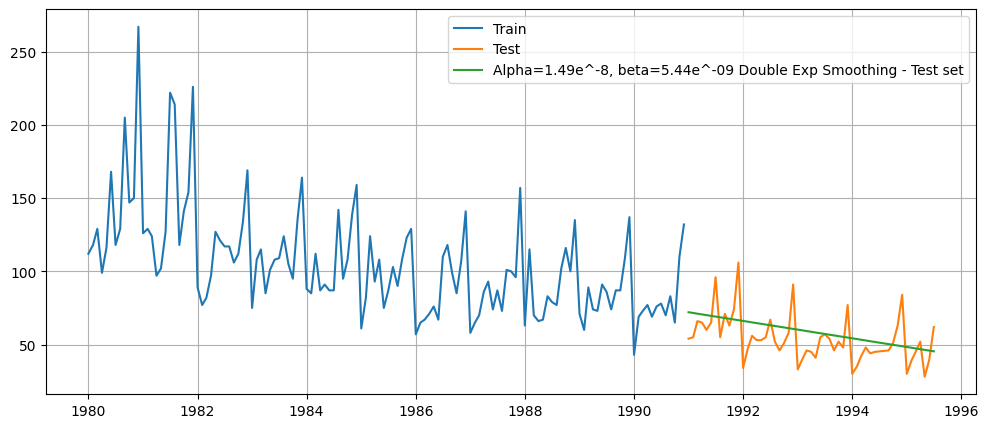

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(DES_predict,label="Alpha=1.49e^-8, beta=5.44e^-09 Double Exp Smoothing - Test set")
plt.grid()
plt.legend(loc="best")

The blue series is of Training set and orange one is of test set and green line is the predicted values using double exponential smoothing method with alpha and beta values as 1.49e^-08 and 5.44e^-09

In [ ]:
rmse_DES=mean_squared_error(DES_test.values,DES_predict.values,squared=False)
rmse_DES

15.27096843395306

In [ ]:
DES_DF=pd.DataFrame({"Test RMSE":[rmse_DES]},index=["alpha=1.49e^-08, beta=5.44e^-09 Holt method"])
Result_DF=pd.concat([Result_DF,DES_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968


#Triple Exponential Smoothing
* Made a copy of Train and Test for Triple Exponential Smoothing as TES_train and TES_test.
* Using Triple Exponential Smoothing with initialization method as estimated built a model with DES_train along with Trend as additive and seasonal as additive and multiplicative.
* Two models were built with trend as additive and seasonality as additive and trend as additive and seasonality as multiplicative.
* Built model is fitted with optimized as True.


In [ ]:
TES_train=Train.copy()
TES_test=Test.copy()

In [ ]:
TES_model=ExponentialSmoothing(TES_train,trend="additive",seasonal="additive",initialization_method="Estimated")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
TES_model=TES_model.fit(optimized=True)
TES_model.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* For Triple exponential smoothing 3 values are considered while building the model Smoothing level (alpha), trend (beta) and seasonality (gamma).
* The smoothing level for the above model is alpha =0.084, beta =5.52^-06 and gamma=0.0005 for additive seasonality model built.
* Then the model built is forecasted on the length of test set.


In [ ]:
TES_predict=TES_model.forecast(steps=len(TES_test))
TES_predict.head(10)

1991-01-01    42.574560
1991-02-01    54.372099
1991-03-01    61.821511
1991-04-01    50.671639
1991-05-01    58.932400
1991-06-01    63.751320
1991-07-01    73.204015
1991-08-01    78.742349
1991-09-01    74.177124
1991-10-01    71.738917
Freq: MS, dtype: float64

In [ ]:
TES_predict.tail(10)

1994-10-01     51.949742
1994-11-01     69.527954
1994-12-01    111.217080
1995-01-01     16.188994
1995-02-01     27.986533
1995-03-01     35.435945
1995-04-01     24.286073
1995-05-01     32.546833
1995-06-01     37.365753
1995-07-01     46.818448
Freq: MS, dtype: float64

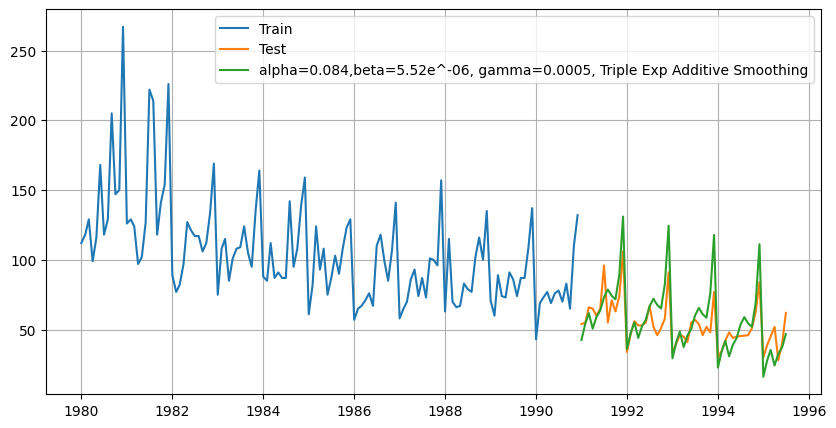

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(TES_predict,label="alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing")
plt.grid()
plt.legend(loc="best")

The blue series is Training set, orange is of test and green is of Triple exponential smoothing with additive seasonality.
We can see that the predict values are slightly following the trend and seasonality of test set.


In [ ]:
rmse_TES=mean_squared_error(TES_test.values,TES_predict.values,squared=False)
rmse_TES

14.24323950074202

In [ ]:
TES_DF=pd.DataFrame({"Test RMSE":[rmse_TES]},index=["alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing"])
Result_DF=pd.concat([Result_DF,TES_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240


In [ ]:
TES_model_mul=ExponentialSmoothing(TES_train,trend="additive",seasonal="multiplicative",initialization_method="Estimated")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
TES_model_mul=TES_model_mul.fit(optimized=True)
TES_model_mul.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

The smoothing level for the above model is alpha =0.077, beta =0.039 and gamma=0.0008 for multiplicative seasonality model built.
Then the model built is forecasted on the length of test set.


In [ ]:
TES_predict_mul=TES_model_mul.forecast(steps=len(TES_test))
TES_predict_mul.head(10)

1991-01-01    55.942246
1991-02-01    63.240624
1991-03-01    68.899674
1991-04-01    60.007486
1991-05-01    67.257150
1991-06-01    72.880875
1991-07-01    79.913317
1991-08-01    84.831135
1991-09-01    79.856761
1991-10-01    78.009465
Freq: MS, dtype: float64

In [ ]:
TES_predict_mul.tail(10)

1994-10-01     67.982518
1994-11-01     78.920680
1994-12-01    108.314382
1995-01-01     46.653350
1995-02-01     52.703422
1995-03-01     57.379568
1995-04-01     49.939092
1995-05-01     55.932782
1995-06-01     60.566420
1995-07-01     66.362913
Freq: MS, dtype: float64

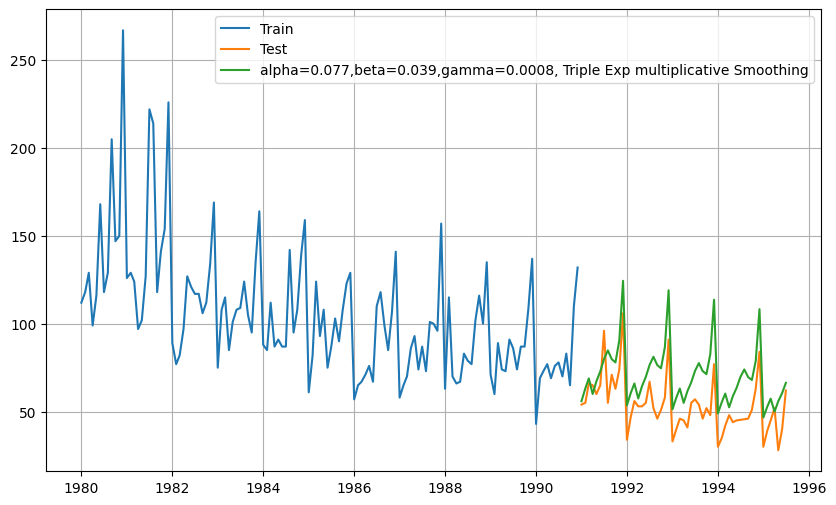

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(TES_predict_mul,label="alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing")
plt.grid()
plt.legend(loc="best")

The blue series is Training set, orange is of test and green is of Triple exponential smoothing with multiplicative seasonality.
We can see that the predict values are very slightly following the trend and seasonality of test set.


In [ ]:
rmse_TES_mul=mean_squared_error(TES_test.values,TES_predict_mul.values,squared=False)
rmse_TES_mul

19.113110215160134

In [ ]:
TES_DF_mul=pd.DataFrame({"Test RMSE":[rmse_TES_mul]},index=["alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing"])
Result_DF=pd.concat([Result_DF,TES_DF_mul])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110


#Linear Regression
* Imported Linear Regression from sklearn.linear_model
* Made a copy of Train and Test sets as LR_train and LR_test for performing Linear Regression.
* Created Time columns from the length of train and test set for performing regression.
* Model it for the Train data and predicted on Test data.


In [ ]:
LR_train=Train.copy()
LR_test=Test.copy()

In [ ]:
lr=LinearRegression()

In [ ]:
Train.shape

(132, 1)

In [ ]:
Train_time=[i+1 for i in range(len(LR_train))]
Test_time=[i+133 for i in range(len(LR_test))]

In [ ]:
LR_train["Time"]=Train_time
LR_test["Time"]=Test_time

In [ ]:
LR_train.head()

,Rose,Time
Time_stamp,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [ ]:
LR_model=lr.fit(LR_train[["Time"]],LR_train["Rose"])
LR_model

LinearRegression()

In [ ]:
LR_test_predict=LR_model.predict(LR_test[["Time"]])
LR_test["RegOntime"]=LR_test_predict

In [ ]:
LR_test.head()

,Rose,Time,RegOntime
Time_stamp,,,
1991-01-01,54.0,133,72.063266
1991-02-01,55.0,134,71.568888
1991-03-01,66.0,135,71.074511
1991-04-01,65.0,136,70.580133
1991-05-01,60.0,137,70.085755


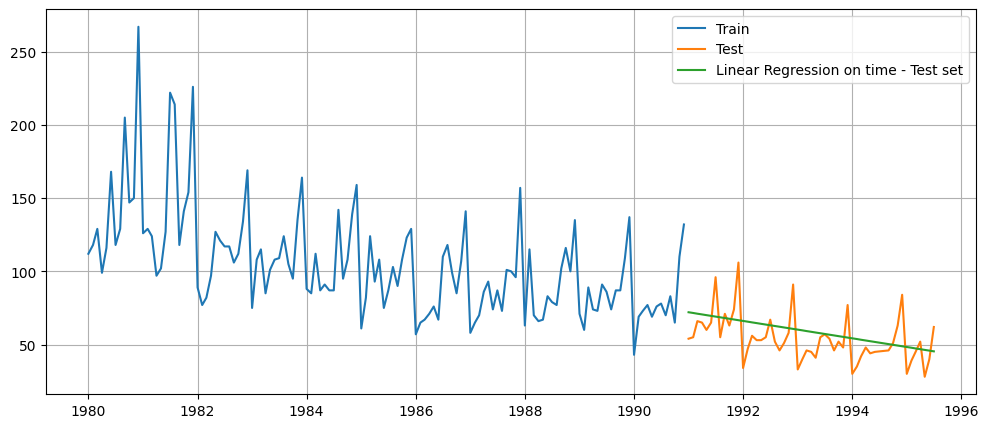

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(LR_test["RegOntime"],label="Linear Regression on time - Test set")
plt.grid()
plt.legend(loc="best")

The blue series is of Train data, orange is of test data and green line is the predicted values of Linear Regression model and it does not follow the pattern of series in the test set.

In [ ]:
rmse_LR=mean_squared_error(LR_test["RegOntime"],LR_test[["Rose"]],squared=False)
rmse_LR

15.268955197146555

In [ ]:
LR_DF=pd.DataFrame({"Test RMSE":[rmse_LR]},index=["Linear Regression"])
Result_DF=pd.concat([Result_DF,LR_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955


#Naive Approach
* Naïve approach is that it predict the values on the basis of the value of training data and predict it as the same value and forecast it across the test data.
* Made a copy of Train and Test set for Naïve approach as Naïve_train and Naïve_test.
* Created an array of numbers from the last value of Training set and predicted the same value across the test set.


In [ ]:
Naive_train=Train.copy()
Naive_test=Test.copy()

In [ ]:
Naive_test["Naive"]=np.asarray(Naive_train["Rose"])[len(np.asarray(Naive_train["Rose"]))-1]
Naive_test.head()

,Rose,Naive
Time_stamp,,
1991-01-01,54.0,132.0
1991-02-01,55.0,132.0
1991-03-01,66.0,132.0
1991-04-01,65.0,132.0
1991-05-01,60.0,132.0


As we can see from the above tables and figure that the predicted values in the test set are the last value from the training set and it is forecasted as the same value across the test set.

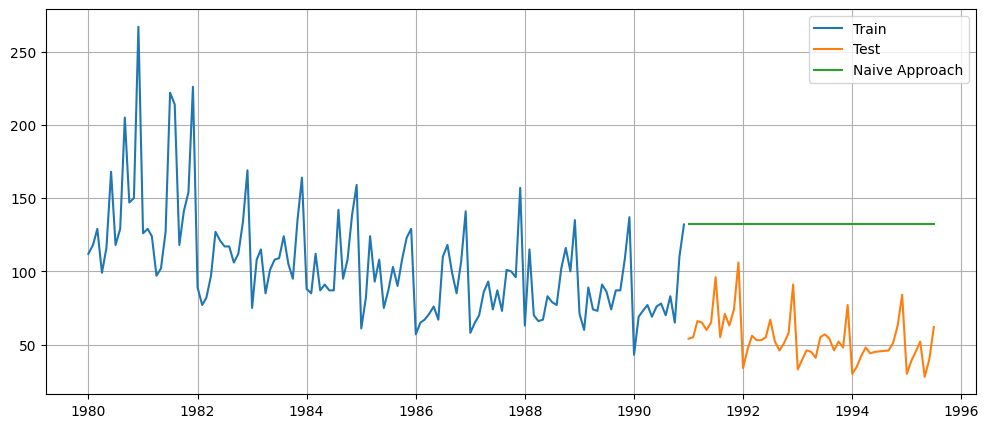

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Naive_test["Naive"],label="Naive Approach")
plt.grid()
plt.legend(loc="best")

In [ ]:
rmse_Naive=mean_squared_error(Naive_test["Rose"],Naive_test["Naive"],squared=False)
rmse_Naive

79.71877337417347

In [ ]:
Naive_DF=pd.DataFrame({"Test RMSE":[rmse_Naive]},index=["Naive forecast"])
Result_DF=pd.concat([Result_DF,Naive_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955
Naive forecast,79.718773


#Simple Average
* Copy of Train and test are taken for model building as Simple_train and Simple_test.
* Simple Average model is that it takes the average or mean of all the values in the train set and forecasts the same value in the test set.


In [ ]:
Simple_train=Train.copy()
Simple_test=Test.copy()

In [ ]:
Simple_test["Mean forecast"]=Simple_train["Rose"].mean()
Simple_test.head()

,Rose,Mean forecast
Time_stamp,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


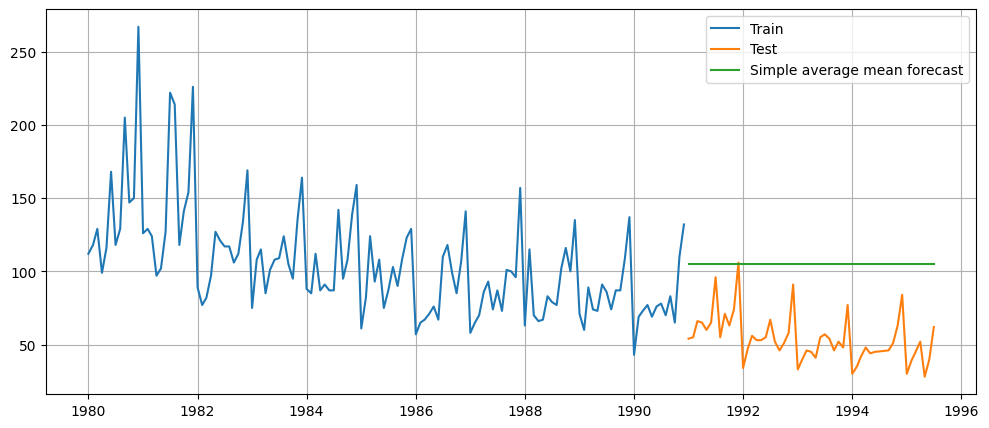

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Simple_test["Mean forecast"],label="Simple average mean forecast")
plt.grid()
plt.legend(loc="best")

As we can see that the forecasted values are in a straight line and are not any closer to the test set series.

In [ ]:
rmse_Simple=mean_squared_error(Simple_test["Mean forecast"],Simple_test["Rose"],squared=False)
rmse_Simple

53.460569646114436

In [ ]:
Simple_DF=pd.DataFrame({"Test RMSE":[rmse_Simple]},index=["Simple Average mean forecast"])
Result_DF=pd.concat([Result_DF,Simple_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955
Naive forecast,79.718773
Simple Average mean forecast,53.460570


#Moving Average

In [ ]:
Moving_average=df.copy()

In [ ]:
Moving_average["Trailing_2"]=Moving_average["Rose"].rolling(2).mean()
Moving_average["Trailing_4"]=Moving_average["Rose"].rolling(4).mean()
Moving_average["Trailing_6"]=Moving_average["Rose"].rolling(6).mean()
Moving_average["Trailing_9"]=Moving_average["Rose"].rolling(9).mean()

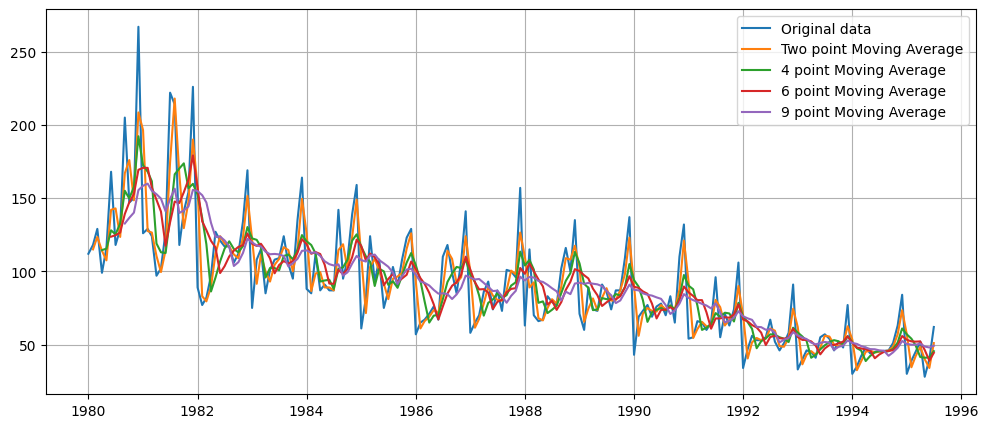

In [ ]:
plt.plot(Moving_average["Rose"],label="Original data")
plt.plot(Moving_average["Trailing_2"],label="Two point Moving Average")
plt.plot(Moving_average["Trailing_4"],label="4 point Moving Average")
plt.plot(Moving_average["Trailing_6"],label="6 point Moving Average")
plt.plot(Moving_average["Trailing_9"],label="9 point Moving Average")
plt.grid()
plt.legend(loc="best")

 2 point moving average is very close to the series in the test set, which is of green colour in the plot.

In [ ]:
Moving_train=Moving_average[Moving_average.index.year<1991]
Moving_test=Moving_average[Moving_average.index.year>=1991]

In [ ]:
Moving_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_stamp,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


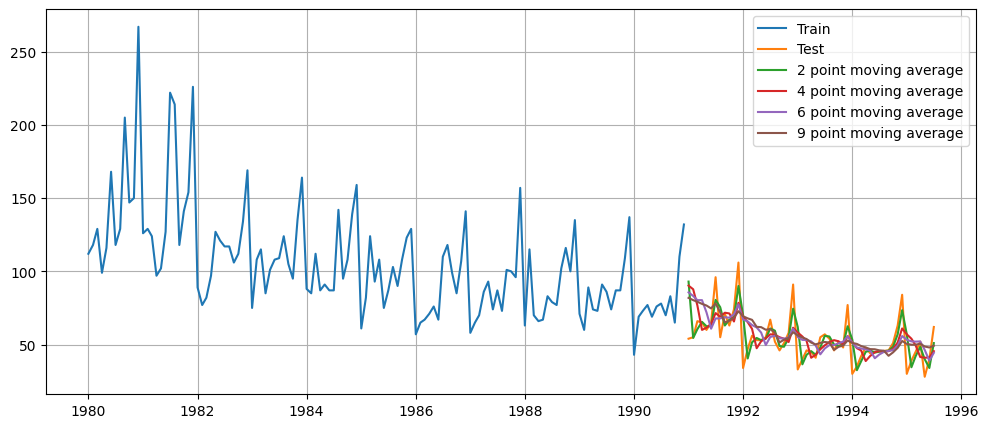

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Moving_test["Trailing_2"],label="2 point moving average")
plt.plot(Moving_test["Trailing_4"],label="4 point moving average")
plt.plot(Moving_test["Trailing_6"],label="6 point moving average")
plt.plot(Moving_test["Trailing_9"],label="9 point moving average")
plt.grid()
plt.legend(loc="best")

In [ ]:
rmse_2point=mean_squared_error(Moving_test["Trailing_2"],Moving_test["Rose"],squared=False)
rmse_2point

11.52927761935857

In [ ]:
rmse_4point=mean_squared_error(Moving_test["Trailing_4"],Moving_test["Rose"],squared=False)
rmse_4point

14.451403238286431

In [ ]:
rmse_6point=mean_squared_error(Moving_test["Trailing_6"],Moving_test["Rose"],squared=False)
rmse_6point

14.566327265691354

In [ ]:
rmse_9point=mean_squared_error(Moving_test["Trailing_9"],Moving_test["Rose"],squared=False)
rmse_9point

14.727629822363193

In [ ]:
Moving_DF=pd.DataFrame({"Test RMSE":[rmse_2point,rmse_4point,rmse_6point,rmse_9point]},
                       index=["2 Point Moving Average","4 Point Moving Average","6 Point Moving Average","9 Point Moving Average"])
Result_DF=pd.concat([Result_DF,Moving_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955
Naive forecast,79.718773
Simple Average mean forecast,53.460570
2 Point Moving Average,11.529278
4 Point Moving Average,14.451403
6 Point Moving Average,14.566327


* Above is the table of Root mean squared error values of all the models built.
* Mean_squared_error is import sklearn.metrics and RMSE values are calculated by using Actual test and Predicted test values and squared is kept as False.
* The lower the values of Root mean squared error (RMSE) the best the model, as lower error models follow the series closely than high RMSE value models.


#Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#Note: Stationarity should be checked at alpha = 0.05.

* Stationarity means the variance and auto correlation of time series are constant over time.
* We can check for the stationary of the data using Dickey fuller test.
Augmented Dickey fuller (adfuller) is imported from statsmodels.tsa.stattools.
* ARIMA and SARIMA models can only be performed when the time series is stationary.


# Test for Stationarity using ADFuller test

# Null hypothesis:Time series is non stationary
#Alternate hypothesis : Time Series is Stationary
#If P value is less than 0.05 then, reject null hypothesis.
#If p value greater than 0.05 then we failed to reject null hypothesis .i.e., Time series is non stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  print("Dickey Fuller test:")
  dftest=adfuller(timeseries,autolag="AIC")
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput,'\n')

In [ ]:
test_stationarity(df["Rose"])

Dickey Fuller test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



* From the above table, we can see that the alpha/p value of time series in greater than 0.05.
* So, we failed to reject null hypothesis that means the time series is not stationary.
* For further proceedings, we need to make time series stationary.
* In order to make the time series we need to use differencing method which is if d=1, then the difference of current point and previous point is taken and so on, until time series becomes stationary.
* Now let’s check for stationary after performing differencing with d=1


In [ ]:
test_stationarity(df["Rose"].diff().dropna())

Dickey Fuller test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



From the above table we can see that the value of alpha/p value is less than 0.05, thus we can reject null hypothesis.
Now the time series is stationary.



In [ ]:
test_stationarity(Train["Rose"])

Dickey Fuller test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [ ]:
test_stationarity(Train["Rose"].diff().dropna())

Dickey Fuller test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



#Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

* We have to take d value as 1 to make the time series stationary.
* As for p and q values we can range of values between 0 and 3 and using for loop we will get different parameters for building a model.


In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


* These are parameters generated by using for loop for building ARIMA model.
* Created a dataframe for storing AIC values for modelling parameters, the parameters having having lowest values are taken for building ARIMA model.
ARIMA model is built and Train values are fit into it and using for loop all the p, q and d values are passed.
* All the AIC values obtained from the model are appended into a data frame, so that we can get best model parameters from all the values and are sorted in ascending order.


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(Train["Rose"].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046


<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC

ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563


<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1281.870722226456


<ipython-input-128-ec167437411c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


* From the above table we can see that AIC value of p=0, d=1 and q=2 gives us the least AIC value.
* Now using the above parameters let’s build ARIMA model and fit it into train set along with p, q, and d values.


In [ ]:
auto_ARIMA=ARIMA(Train["Rose"],order=(0,1,2),freq="MS")
result_auto_ARIMA=auto_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
auto_ARIMA_predict=result_auto_ARIMA.forecast(steps=len(Test))
auto_ARIMA_predict.head(10)

1991-01-01    96.026636
1991-02-01    87.495114
1991-03-01    87.495114
1991-04-01    87.495114
1991-05-01    87.495114
1991-06-01    87.495114
1991-07-01    87.495114
1991-08-01    87.495114
1991-09-01    87.495114
1991-10-01    87.495114
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
rmse_ARIMA=mean_squared_error(Test["Rose"],auto_ARIMA_predict,squared=False)
rmse_ARIMA

37.30647971907354

In [ ]:
ARIMA_DF=pd.DataFrame({"Test RMSE":[rmse_ARIMA]},index=["ARIMA model (0,1,2)"])
Result_DF=pd.concat([Result_DF,ARIMA_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955
Naive forecast,79.718773
Simple Average mean forecast,53.460570
2 Point Moving Average,11.529278
4 Point Moving Average,14.451403
6 Point Moving Average,14.566327


#SARIMA
* We have to take d value as 1 to make the time series stationary.
* As for p and q values we can range of values between 0 and 3 and using for loop we will get different parameters for building a model and for performing we have to include seasonality in the model parameters.
* Taking seasonality as 6.

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print("some parameter combinations for Model...")
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


* Above table shows the combination of parameters used for calculating AIC scores for building SARIMA model.
* SARIMA model is fitted into for loop with Training data values and parameters and AIC scores are calculated  and are appended into a data frame and is arranged in ascending order so that the model built using certain parameters which has lower AIC values are in top.


In [ ]:
SARIMA_AIC=pd.DataFrame(columns=["param","seasonal","AIC"])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train["Rose"].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827386
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149143
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721269
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515151


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426131708
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752784
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745046
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746457


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124653474
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982476


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518764942


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.004408262805
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1192.001719456319


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1081.832406956151
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1222.0132244495626


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1153.8519348207167


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1061.4359846057168
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1089.0244978807445


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1090.2265071909335


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1043.6002611507024
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.8763225267428
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1135.549810581567
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1250.6246888229598


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.6009595917922
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696528001
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1123.2830148980006


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.9425392417138
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1105.9092655263669


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1201.503714442441
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1093.6044317606431


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1213.623314313094
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.424000437736


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.2585834383817
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1083.9006911266617


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1083.1711266751279


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.7784697286772
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1251.949504070617
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.2804057586225


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1083.8066266630815
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1213.2183953752817


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.4829113448097


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437952423


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1081.9393759714105


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1091.7082778420809
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.6558183805287
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.963073454043
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220643
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1219.0664587880906


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1186.6130717491167
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.670248069002


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026213
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081243


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.6114741768044
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.2315231795724
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.4126986467897


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1092.4754616553787
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.8335862393578


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919138057


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.8188703387534
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092257


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627385214


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607523542
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.910211614671


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.769192440147


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.558103334027
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510907


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283270192418


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103216086178


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457928512


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.077179891584


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2300486070872


<ipython-input-138-f70106a4f8e4>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.230049
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


* The above table shows the least 5 AIC score for a combination of pdq, D values.
* The best parameters for building our model is (1,1,2) and (2,0,2,6).
* Now again the above mentioned parameters are passed for building SARIMA model with Training values and the model is fitted with max iters as 1000.


In [ ]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train["Rose"].values,
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)

In [ ]:
auto_SARIMA_predict=results_auto_SARIMA_6.forecast(steps=len(Test))
auto_SARIMA_predict

array([ 62.83834433,  67.6288295 ,  74.74528927,  71.3239387 ,
        76.01600429,  75.03380945,  81.18363232,  84.18998929,
        83.66477912,  83.84922951,  90.20441918, 108.573233  ,
        65.67851253,  67.24449926,  74.6539625 ,  70.94178121,
        74.99014396,  72.72572295,  80.77521928,  83.11715091,
        82.26970312,  82.62222681,  87.76073129, 103.41283961,
        66.66759825,  67.8400752 ,  74.15725243,  70.99657483,
        74.09727951,  71.2041597 ,  80.30515072,  82.21073006,
        81.09957934,  81.59510505,  85.74362957,  99.15175155,
        67.5300812 ,  68.40171787,  73.80970456,  71.10770121,
        73.46855834,  70.18504121,  79.85384207,  81.40968114,
        80.13243235,  80.72018585,  84.07833708,  95.6145654 ,
        68.2871653 ,  68.92645268,  73.57648936,  71.25633445,
        73.04139773,  69.54504502,  79.42510043])

In [ ]:
rmse_SARIMA=mean_squared_error(Test["Rose"],auto_SARIMA_predict,squared=False)
rmse_SARIMA

26.133356913074714

In [ ]:
SARIMA_DF=pd.DataFrame({"Test RMSE":[rmse_SARIMA]},index=["SARIMA model (1,1,2)(2,0,2,6)"])
Result_DF=pd.concat([Result_DF,SARIMA_DF])
Result_DF

,Test RMSE
alpha=0.098 Simple Exponential Smoothing,36.796225
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
Linear Regression,15.268955
Naive forecast,79.718773
Simple Average mean forecast,53.460570
2 Point Moving Average,11.529278
4 Point Moving Average,14.451403
6 Point Moving Average,14.566327


#Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
Result_DF.sort_values(by=["Test RMSE"]).head(13)

,Test RMSE
2 Point Moving Average,11.529278
"alpha=0.084,beta=5.52e^-06, gamma=0.0005, Triple Exp Additive Smoothing",14.243240
4 Point Moving Average,14.451403
6 Point Moving Average,14.566327
9 Point Moving Average,14.727630
Linear Regression,15.268955
"alpha=1.49e^-08, beta=5.44e^-09 Holt method",15.270968
"alpha=0.077,beta=0.039,gamma=0.0008, Triple Exp multiplicative Smoothing",19.113110
"SARIMA model (1,1,2)(2,0,2,6)",26.133357
alpha=0.098 Simple Exponential Smoothing,36.796225


* Above table shows the Root Mean Squared Error values built using the model along with their parameters ordered in ascending so that the least RMSE models will be on top.
* For Rose wine sales data, we got least RMSE value for 2 point moving average followed by triple exponential additive smoothing and 4 point moving average.

#Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#Prediction on Triple Additive Exponential Smoothing model

* Now that the models performances have been calculated using RMSE values and models with least error are used for predicting into the future of how will be the sales for the next 12 months i.e., from 1-Aug-1995 to 1-July-1996.
* 2nd model for predicting the next 12 months of wine sales is the model with the least RMSE value which is triple exponential smoothing model with additive seasonality.
* The parameters are set into Exponential smoothing and the model is fitted into complete data.
* Using the model with fitted parameters and forecast into next 12 months.

In [ ]:
fullmodel_TES_Add= ExponentialSmoothing(df,
                                  trend="additive",
                                  seasonal="additive").fit(smoothing_level=0.084,
                                                                 smoothing_trend=0.000005,
                                                                 smoothing_seasonal=0.0005)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel_TES_add =mean_squared_error(df["Rose"],fullmodel_TES_Add.fittedvalues,squared=False)
RMSE_fullmodel_TES_add

17.669076433657235

In [ ]:
prediction_1 = fullmodel_TES_Add.forecast(steps=12)

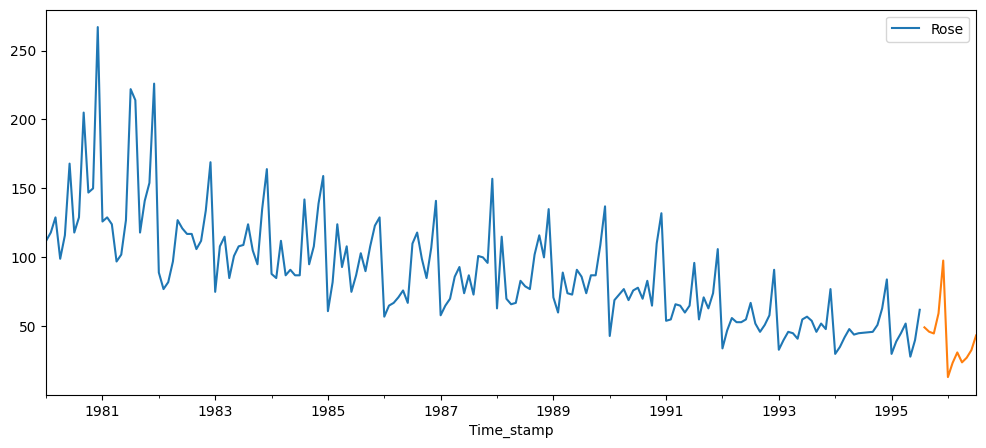

In [ ]:
df.plot();
prediction_1.plot();

* Above plot is the plot of Triple exponential additive smoothing model prediction for 12 months which is from 1-Aug-1995 to 1-Jul-1996.
Orange series denotes the forecasted values and blue series denotes the original series plotted against time stamp and sales of wines.


In [ ]:
pred_df_Add = pd.DataFrame({"lower_CI":prediction_1 - 1.96*np.std(fullmodel_TES_Add.resid,ddof=1),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*np.std(fullmodel_TES_Add.resid,ddof=1)})
pred_df_Add.head(12)

,lower_CI,prediction,upper_ci
1995-08-01,14.526812,49.251172,83.975532
1995-09-01,11.351790,46.076150,80.800510
1995-10-01,10.085789,44.810149,79.534509
1995-11-01,24.686334,59.410695,94.135055
1995-12-01,62.956865,97.681225,132.405585
1996-01-01,-21.535701,13.188659,47.913019
1996-02-01,-11.225172,23.499188,58.223548
1996-03-01,-3.664562,31.059798,65.784158
1996-04-01,-10.855498,23.868862,58.593222
1996-05-01,-7.483847,27.240513,61.964873


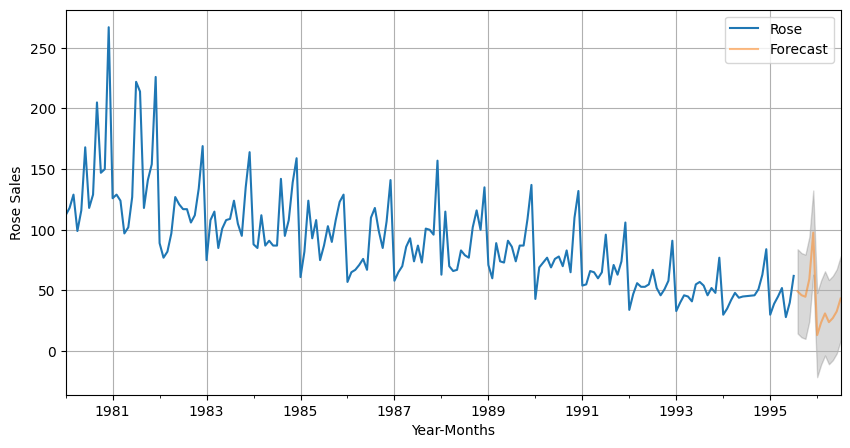

In [ ]:
axis = df.plot(label="Actual", figsize=(10,5))
pred_df_Add["prediction"].plot(ax=axis, label="Forecast", alpha=0.5)
axis.fill_between(pred_df_Add.index, pred_df_Add["lower_CI"], pred_df_Add["upper_ci"], color="k", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose Sales")
plt.legend(loc="best")
plt.grid()
plt.show()

From the above we can see that the forecasted series is similar to the original series and it is plotted with confidence intervals means the forecasted values is in range of confidence intervals

# Recommendations:
* After building various models for sparkling wines sales data, the performance of 2 point moving average model gives the least RMSE value which is the method used for measuring performance.
* Least RMSE means the least errors in the model and the forecasted values follow the trend and seasonality of the original data.
* The best model for forecasting is 2 point moving average method followed by Triple exponential additive smoothing method.
* From the analysis from the data, we can see the most sales are in the last months of the year.
* There is a fluctuation in monthly sales of the wine.
* Yearly sales have been decreasing from 1980 to 1995.
* Sales of rose wine are more in December month across all the years.
